# A beautiful introduction to chaotic systems and fractals

## What does the 'B' in Benoit B. Mandelbrot stand for? 


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Chaotic systems:

## Definition: 
Apparently stochastic behavior occurring in a deterministic non linear system.

## Main property: 
Extreme sensitivity to initial conditions (SIC). If an inﬁnitesimal change is made to the initial conditions, the corresponding change iterated through the system until time t will grow exponentially with t. (Butterﬂy effect)


## Lorenz’s Map
This is the simpliﬁed system of convection rolls arising in the equations of the atmosphere. A small change in the IC conditions would lead to a drastically different weather a few days later.

$\begin{aligned}
 \frac{dx}{dt} &= σ(y−x) \\
 \frac{dy}{dt} &= x(ρ−z)−y  \\
 \frac{dz}{dt} &= xy−βz \\
\end{aligned}$

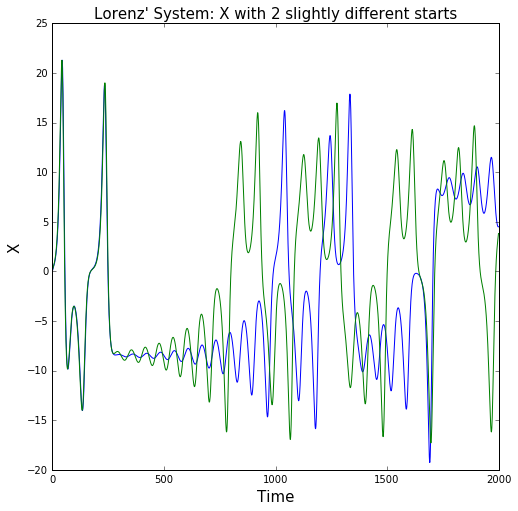

In [56]:
def Lorenz(start,sigma,rho,beta,dt,N):
    res = [start]
    x = start[0]
    y = start[1]
    z = start[2]
    for n in range(N-1):
        dx = sigma*(y-x)
        dy = x*(rho-z)-y
        dz = x*y - beta*z
        x+=dx*dt
        y+=dy*dt
        z+=dz*dt
        res.append([x,y,z])
    return res

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
N = 5000
dt = 0.01

Lorenz0 = Lorenz([0.0, 1.0, 1.0], sigma, rho, beta, dt, N)
Lorenz1 = Lorenz([0.1, 1.0, 1.0], sigma, rho, beta, dt, N)

Lorenz0_x = [e[0] for e in Lorenz0]
Lorenz1_x = [e[0] for e in Lorenz1]

plt.figure(figsize=(8,8))
plt.plot(range(2000), Lorenz0_x[:2000])
plt.plot(range(2000), Lorenz1_x[:2000])
plt.title("Lorenz' System: X with 2 slightly different starts", fontsize=15)
plt.ylabel('X', fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.show()

## Rossler’s Map 

$\begin{aligned}
 \frac{dx}{dt} &= −(y+z) \\
 \frac{dy}{dt} &= x+ay  \\
 \frac{dz}{dt} &= b+z(x−c) \\
\end{aligned}$

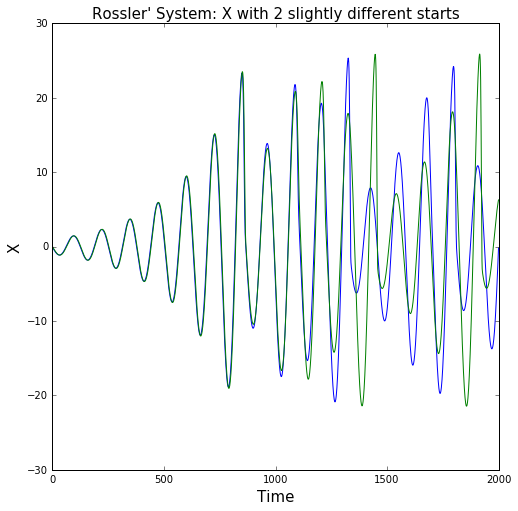

In [58]:
def Rossler(start, a, b, c, dt, N):
    res = [start]
    x = start[0]
    y = start[1]
    z = start[2]
    for n in range(N-1):
        dx = -(y+z)
        dy = x+a*y
        dz = b+z*(x-c)
        x+=dx*dt
        y+=dy*dt
        z+=dz*dt
        res.append([x,y,z])
    return res

a = 0.1
b = 0.1
c = 14
N = 20000
dt = 0.05

Rossler0 = Rossler([0.0, 1.0, 1.0], a, b, c, dt, N)
Rossler1 = Rossler([0.1, 1.0, 1.0], a, b, c, dt, N)
Rossler0_x = [e[0] for e in Rossler0]
Rossler1_x = [e[0] for e in Rossler1]

plt.figure(figsize=(8,8))
plt.plot(range(2000),Rossler0_x[:2000])
plt.plot(range(2000),Rossler1_x[:2000])
plt.title("Rossler' System: X with 2 slightly different starts", fontsize=15)
plt.ylabel('X', fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.show()

# Henon's Map



$\begin{aligned}
    x_{t+1} &= y_t − ax^2_t+1 \\
    y_{t+1} &= bx_t \\
\end{aligned}$

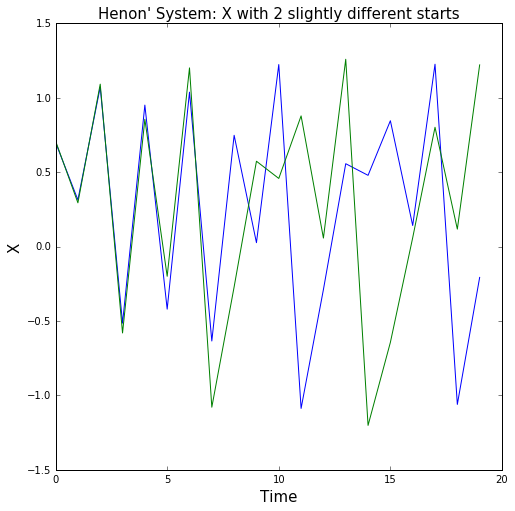

In [142]:
def Henon(start, a, b, N):
    res = [start]
    x = start[0]
    y = start[1]
    for n in range(N-1):
        u = y - a*x*x +1
        y = b*x
        x = u
        res.append([x,y])
    return res

a = 1.4
b = 0.3
N = 1000000

Henon0 = Henon([0.7, 0.0], a, b, N)
Henon1 = Henon([0.71, 0.0], a, b, N)
Henon0_x = [e[0] for e in Henon0]
Henon1_x = [e[0] for e in Henon1]

plt.figure(figsize=(8,8))
plt.plot(range(20), Henon0_x[:20])
plt.plot(range(20), Henon1_x[:20])
plt.title("Henon' System: X with 2 slightly different starts", fontsize=15)
plt.ylabel('X', fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.show()

## 2. Strange Attractors: Some order in Randomness

As time goes by, 
- Strange attractors are suggestive pictures of an equilibrium.
- They can be plotted from a chaotic series to show some order in fake randomness. 
- It relates to the long term dynamic behavior of a system. 
- They also have the property of fractals: part of the ﬁgure resembles to the total ﬁgure (and vice versa).
- Those intriguing ﬁgures occupy only a fraction of the space available. 
- One can attribute a fractal (i.e. non-integer) dimension to this fraction.

Projection (x,y) and (x,z) for different initial conditions. We could think of every wing as one weather excursion in either the winter or the summer season.

## Lorenz' strange attractor

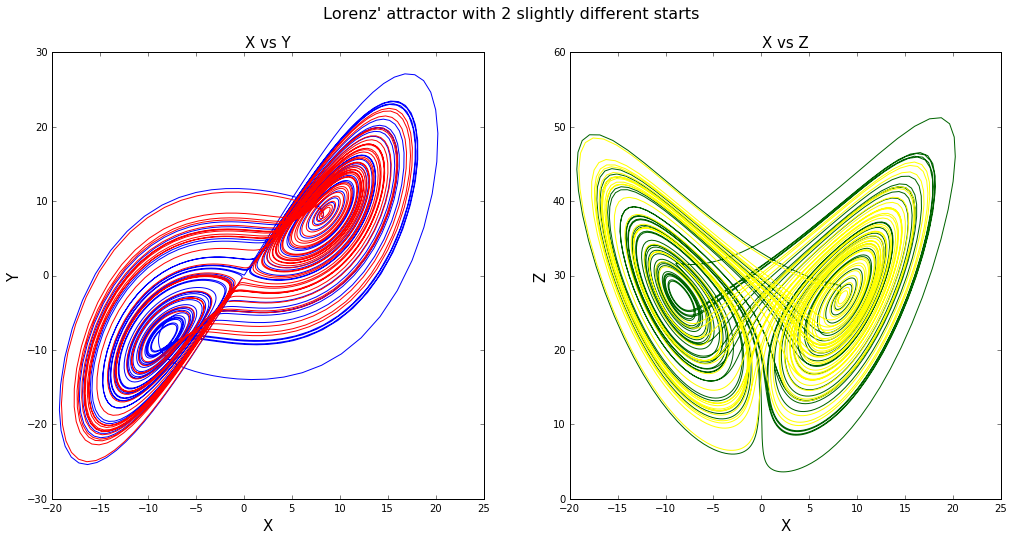

In [98]:
Lorenz0_y = [e[1] for e in Lorenz0]
Lorenz1_y = [e[1] for e in Lorenz1]
Lorenz0_z = [e[2] for e in Lorenz0]
Lorenz1_z = [e[2] for e in Lorenz1]

plt.figure(figsize=(17,8))
plt.suptitle("Lorenz' attractor with 2 slightly different starts", fontsize=16)
ax1 = plt.subplot("121")
ax1 = plt.plot(Lorenz0_x[1000:], Lorenz0_y[1000:],"blue")
ax1 = plt.plot(Lorenz1_x[1000:], Lorenz1_y[1000:],"r")
ax1 = plt.title("X vs Y", fontsize=15)
ax1 = plt.ylabel('Y', fontsize=15)
ax1 = plt.xlabel("X", fontsize=15)
ax2 = plt.subplot("122")
ax2 = plt.plot(Lorenz0_x[1000:], Lorenz0_z[1000:],"darkgreen")
ax2 = plt.plot(Lorenz1_x[1000:], Lorenz1_z[1000:],"yellow")
ax2 = plt.title("X vs Z", fontsize=15)
ax2 = plt.ylabel('Z', fontsize=15)
ax2 = plt.xlabel("X", fontsize=15)
plt.show()

## Rossler's attractor

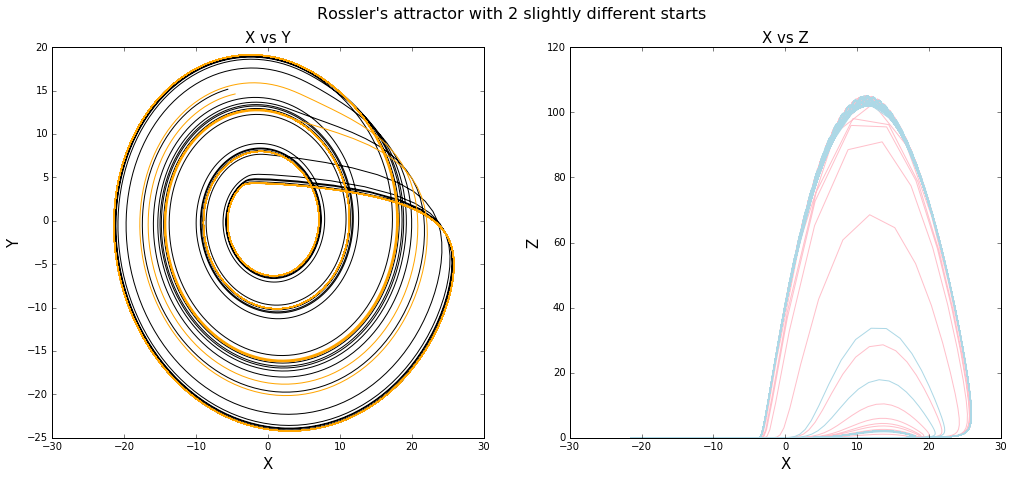

In [99]:
Rossler0_y = [e[1] for e in Rossler0]
Rossler1_y = [e[1] for e in Rossler1]
Rossler0_z = [e[2] for e in Rossler0]
Rossler1_z = [e[2] for e in Rossler1]

plt.figure(figsize=(17,7))
plt.suptitle("Rossler's attractor with 2 slightly different starts", fontsize=16)
ax1 = plt.subplot("121")
ax1 = plt.plot(Rossler0_x[1000:], Rossler0_y[1000:],"black")
ax1 = plt.plot(Rossler1_x[1000:], Rossler1_y[1000:],"orange")
ax1 = plt.title("X vs Y", fontsize=15)
ax1 = plt.ylabel('Y', fontsize=15)
ax1 = plt.xlabel("X", fontsize=15)
ax2 = plt.subplot("122")
ax2 = plt.plot(Rossler0_x[1000:], Rossler0_z[1000:],"pink")
ax2 = plt.plot(Rossler1_x[1000:], Rossler1_z[1000:],"lightblue")
ax2 = plt.title("X vs Z", fontsize=15)
ax2 = plt.ylabel('Z', fontsize=15)
ax2 = plt.xlabel("X", fontsize=15)
plt.show()

## Henon's attractor

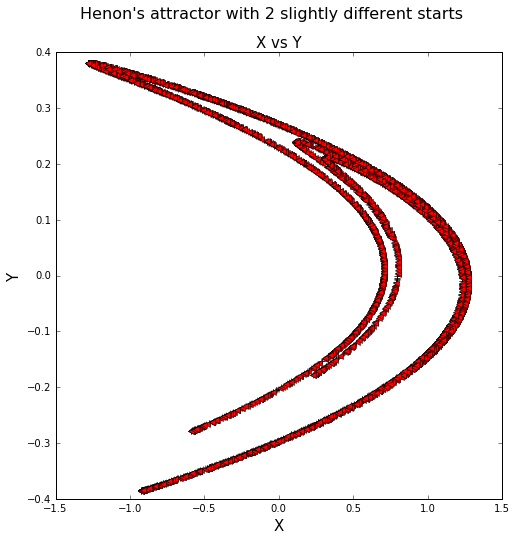

In [143]:
Henon0_y = [e[1] for e in Henon0]
Henon1_y = [e[1] for e in Henon1]

plt.figure(figsize=(8,8))
plt.suptitle("Henon's attractor with 2 slightly different starts", fontsize=16)
ax1 = plt.subplot("111")
ax1 = plt.title("X vs Y", fontsize=15)
ax1 = plt.plot(Henon0_x[22000:26300], Henon0_y[22000:26300],"black", marker = "+", linestyle="None")
ax1 = plt.plot(Henon1_x[22000:26300], Henon1_y[22000:26300],"red", marker = "<", linestyle="None")
ax1 = plt.ylabel('Y', fontsize=15)
ax1 = plt.xlabel("X", fontsize=15)
plt.show()

# 3. Fractal property of the strange attractors

Part of the ﬁgure resembles to the total figure (and vice versa)

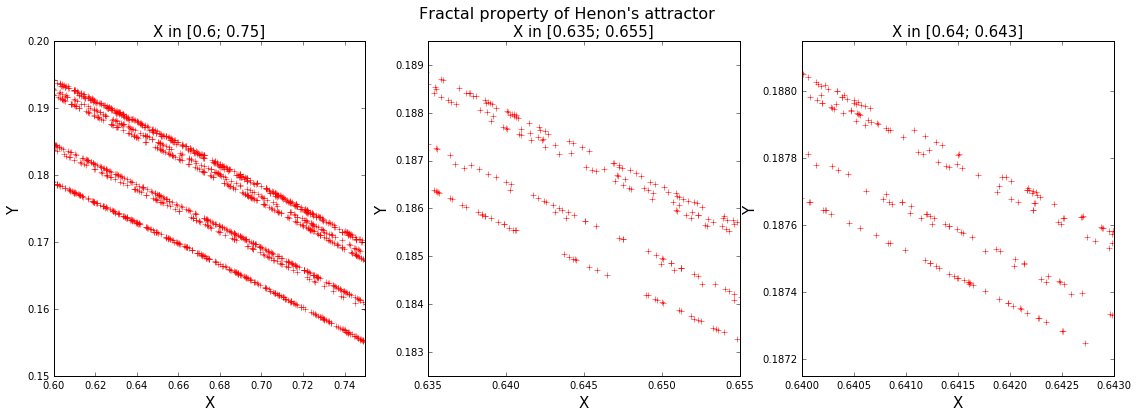

In [146]:
plt.figure(figsize=(19,6))
plt.suptitle("Fractal property of Henon's attractor", fontsize=16)
ax1 = plt.subplot("131")
ax1 = plt.plot(Henon1_x[5000:50000], Henon1_y[5000:50000],"red", marker = "+", linestyle="None")
ax1 = plt.title("X in [0.6; 0.75]", fontsize=15)
ax1 = plt.ylabel('Y', fontsize=15)
ax1 = plt.xlabel("X", fontsize=15)
ax1 = plt.xlim((0.6, 0.75))
ax1 = plt.ylim((0.15,0.2))
ax2 = plt.subplot("132")
ax2 = plt.plot(Henon1_x[5000:100000], Henon1_y[5000:100000],"red", marker = "+", linestyle="None")
ax2 = plt.title("X in [0.635; 0.655]", fontsize=15)
ax2 = plt.ylabel('Y', fontsize=15)
ax2 = plt.xlabel("X", fontsize=15)
ax2 = plt.xlim((0.635, 0.655))
ax2 = plt.ylim((0.1825, 0.1895))
ax2 = plt.subplot("133")
ax2 = plt.plot(Henon1_x[5000:1000000], Henon1_y[5000:1000000],"red", marker = "+", linestyle="None")
ax2 = plt.title("X in [0.64; 0.643]", fontsize=15)
ax2 = plt.ylabel('Y', fontsize=15)
ax2 = plt.xlabel("X", fontsize=15)
ax2 = plt.xlim((0.64, 0.643))
ax2 = plt.ylim((0.18715, 0.18815))
plt.show()